<a href="https://colab.research.google.com/github/DiegoFau/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introducción**


La evasión de clientes (Churn) representa uno de los principales desafíos estratégicos para empresas de servicios, ya que impacta directamente en los ingresos recurrentes, el costo de adquisición de clientes y la rentabilidad a largo plazo.
Retener clientes existentes suele ser significativamente más eficiente que captar nuevos, por lo que comprender las causas del abandono es clave para diseñar estrategias efectivas de fidelización.
El presente análisis tiene como objetivo explorar los patrones asociados al churn en la empresa TelecomX, identificando variables demográficas, contractuales, económicas y de servicios que puedan estar influyendo en la decisión de cancelación. A través de un análisis exploratorio de datos (EDA), se busca detectar factores de riesgo y oportunidades de retención que permitan orientar decisiones estratégicas basadas en evidencia.

#1. Contexto y comprensión del dataset

##1.1 Unidad de análisis





Origen de los datos: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json



<pre>Cada fila representa un cliente activo o que canceló el servicio.
Origen de los datos: archivo JSON obtenido vía API (GitHub raw).

##1.2 Objeto de análisis

<pre>Analizar la evasión de clientes (churn).
Identificar patrones asociados a la cancelación del servicio desde un enfoque exploratorio (EDA).

##1.3 Variable objetivo






<pre>Churn: indica si el cliente canceló o no el servicio.
Variable central para segmentación y comparación de comportamientos.

##1.4 Fuente y estructura

<pre>Dataset en formato JSON con estructura anidada.
Contiene información demográfica, contractual, de servicios y facturación.
Requiere normalización para análisis tabular.

#2. Análisis del JSON

<pre>Inspección del archivo original y detección de datos anidados.
Identificación de bloques principales: customer, phone, internet, account.
Justificación del uso de normalización (json_normalize)

<pre>
Cliente
│
├── customerID
├── Churn
├── customer (objeto)
│   ├── gender
│   ├── SeniorCitizen
│   ├── Partner
│   ├── Dependents
│   └── tenure
│
├── phone (objeto)
│   ├── PhoneService
│   └── MultipleLines
│
├── internet (objeto)
│   ├── InternetService
│   ├── OnlineSecurity
│   ├── OnlineBackup
│   └── ...
│
└── account (objeto)
    ├── Contract
    ├── PaperlessBilling
    ├── PaymentMethod
    └── Charges (objeto)
        ├── Monthly
        └── Total
</pre>

#3. Carga de datos

##3.1 Carga de Json

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

df_raw = pd.read_json(url)

##3.3 Inspeccion del DF

In [ ]:
df_raw.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df_raw.shape

(7267, 6)

##3.4 Normalizando el DF

In [ ]:
df = pd.json_normalize(df_raw.to_dict(orient="records"))


##3.5 Revisando el DF normalizado

In [ ]:
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df.shape


(7267, 21)

In [ ]:
df.columns.tolist()


['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

##3.6 Verificando Variable Objetivo

In [ ]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


Confirmando si son NaN o valores vacios

In [ ]:
df["Churn"].isna().sum()

np.int64(0)

In [ ]:
df["Churn"].unique()


array(['No', 'Yes', ''], dtype=object)

Calculando el porcentaje de datos faltantes (3,08%)

In [ ]:
(len(df[df["Churn"] == ""]) / len(df) * 100)


3.0824274115866244

#4. Limpieza y Transformación de Datos

##4.1 Evaluacion de calidad de datos

Problema identificado

  - Churn tiene tres valores: "Yes", "No" y ""

  - El "" representa valor vacio e impacta al 3% de los registros.

Decisión:

  - Convertir "" en NaN
  - Excluir estos registros solo para los análisis que requieran Churn.

##4.2 Análisis del impacto y decisión de tratamiento

In [ ]:
import numpy as np
df["Churn"] = df["Churn"].replace("", np.nan)


Validamos la conversión en NaN

In [ ]:

df["Churn"].isna().sum()
df["Churn"].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869
NaN,224


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df["account.Charges.Total"] = pd.to_numeric(
    df["account.Charges.Total"], errors="coerce")


Revisando conversion satisfactoria.
Muestra 11 NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Revisando el motivo de los NaN
-> Sin cobro, cliente nuevo

In [ ]:
df[df["account.Charges.Total"].isna()][
    ["customerID", "customer.tenure", "account.Charges.Monthly"]]

,customerID,customer.tenure,account.Charges.Monthly
975,1371-DWPAZ,0,56.05
1775,2520-SGTTA,0,20.00
1955,2775-SEFEE,0,61.90
2075,2923-ARZLG,0,19.70
2232,3115-CZMZD,0,20.25
2308,3213-VVOLG,0,25.35
2930,4075-WKNIU,0,73.35
3134,4367-NUYAO,0,25.75
3203,4472-LVYGI,0,52.55
4169,5709-LVOEQ,0,80.85


In [ ]:
df_churn = df[df["Churn"].notna()].copy()
df_churn.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##4.3 Revision de estandarización de variables categoricas

In [ ]:
df["account.Contract"].unique()


array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
df["internet.InternetService"].unique()


array(['DSL', 'Fiber optic', 'No'], dtype=object)

**Análisis de datos**

Se revisaron las principales variables categóricas y se observó que las categorías ya se encuentran estandarizadas, sin variaciones de mayúsculas, espacios o valores inconsistentes. Por este motivo, no fue necesario aplicar transformaciones adicionales sobre strings.

##4.4 Revision valores duplicados

Verificar registros duplicados

In [ ]:
df.duplicated().sum()


np.int64(0)

##4.5 Creación de variables derivadas

In [ ]:
df_churn["Cuentas_Diarias"] = df_churn["account.Charges.Monthly"] / 30


In [ ]:
df_churn[["account.Charges.Monthly", "Cuentas_Diarias"]].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [ ]:
df_churn["Cuentas_Diarias"].describe()


,Cuentas_Diarias
count,7043.000000
mean,2.158723
std,1.003002
min,0.608333
25%,1.183333
50%,2.345000
75%,2.995000
max,3.958333


In [ ]:
df_churn.groupby("Churn")["Cuentas_Diarias"].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2.042171,1.036422,0.608333,0.836667,2.1475,2.946667,3.958333
Yes,1869.0,2.481378,0.822202,0.628333,1.871667,2.6550,3.140000,3.945000


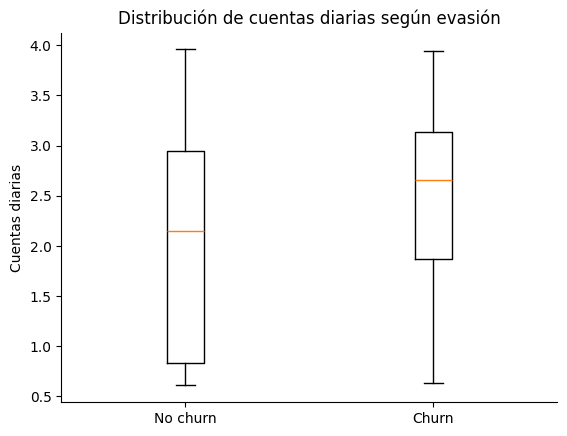

In [ ]:
import matplotlib.pyplot as plt

#Datos
data = [
    df_churn.loc[df_churn["Churn"] == "No", "Cuentas_Diarias"],
    df_churn.loc[df_churn["Churn"] == "Yes", "Cuentas_Diarias"]
]
#Gráfico
fig, ax = plt.subplots()

ax.boxplot(
    data,
    tick_labels=["No churn", "Churn"],
    showfliers=False
)
#Etiquetas
ax.set_title("Distribución de cuentas diarias según evasión")
ax.set_ylabel("Cuentas diarias")

# Quitar Spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()



Verificando duplicados en el churn

In [ ]:
df_churn.duplicated().mean() * 100


np.float64(0.0)

**Análisis de los resultados**

Se creó la variable Cuentas_Diarias a partir del cargo mensual, con el objetivo de normalizar el gasto de los clientes y facilitar análisis comparativos posteriores. La variable presenta valores coherentes y mantiene el patrón observado en los cargos mensuales, por lo que se considera válida para las siguientes etapas del análisis.

Los clientes que abandonan presentan un gasto diario significativamente mayor desde etapas tempranas, lo que refuerza la hipótesis de una brecha entre precio y valor percibido durante el onboarding.

##4.6 Estandarización básica (Binario)

In [ ]:
df_churn["Churn_bin"] = df_churn["Churn"].map({"No": 0, "Yes": 1})


In [ ]:
df_churn[["Churn", "Churn_bin"]].head()
df_churn["Churn_bin"].value_counts()


,count
Churn_bin,
0,5174
1,1869


**Transformación de datos**

Se realizaron transformaciones adicionales para estandarizar variables clave, incluyendo la creación de variables binarias, con el objetivo de facilitar análisis posteriores y potenciales modelos predictivos.

##4.7 **Resumen del proceso de limpieza y transformación**

Durante la etapa de preparación de datos se realizaron los siguientes pasos:
Normalización del archivo JSON para convertir estructuras anidadas en formato tabular.
Identificación y tratamiento de valores faltantes en la variable objetivo (Churn), convirtiendo valores vacíos en NaN.
Exclusión de registros sin información de churn únicamente para análisis relacionados con evasión.
Conversión de la variable account.Charges.Total a formato numérico.
Verificación de registros duplicados (no se detectaron duplicados).
Creación de variables derivadas como Cuentas_Diarias y Churn_bin para facilitar análisis comparativos y modelamiento futuro.
En total, el 3% de los registros presentaban valores faltantes en la variable Churn. Estos fueron excluidos únicamente en análisis donde la variable era necesaria, manteniendo la integridad del dataset original.

#5. Análisis Exploratorio de Datos

##5.1 Distribución

Proporción de clientes que se va

In [ ]:
df_churn['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Porcentaje de clientes que se va

In [ ]:
df_churn["Churn"].value_counts(normalize=True)


,proportion
Churn,
No,0.73463
Yes,0.26537


<pre>Churn:
Bajo (<20%)
Medio (20–35%) <- Situación Actual
Alto (>35%)


Distribución de la evasión de clientes (Número de clientes)

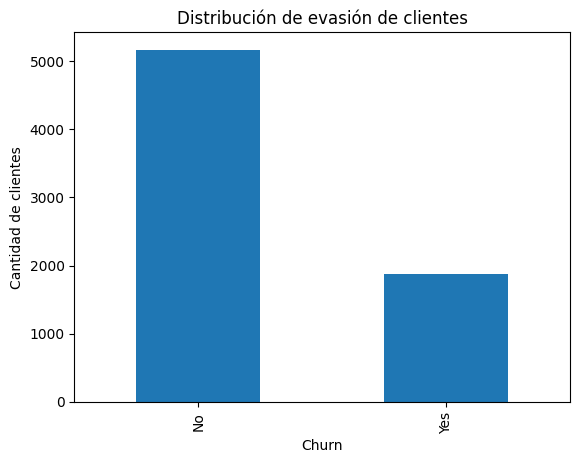

In [ ]:
import matplotlib.pyplot as plt

churn_cantidad_clientes = df_churn["Churn"].value_counts(normalize=False);

# Gráfico
plt.figure()
churn_cantidad_clientes.plot(kind="bar")

# Etiquetas
plt.ylabel("Cantidad de clientes")
plt.xlabel("Churn")
plt.title("Distribución de evasión de clientes")
plt.show()

Distribución de la evasión de clientes (Porcentaje de clientes)

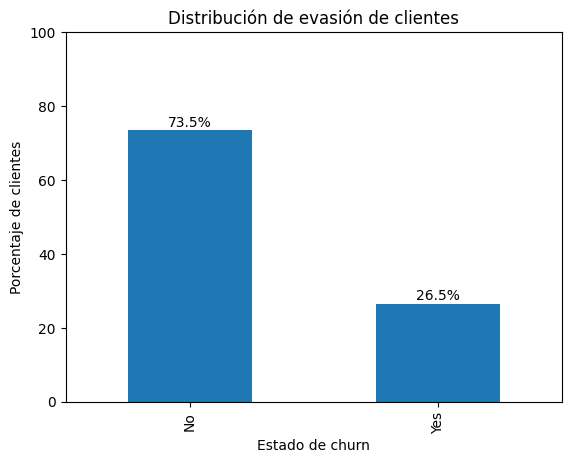

In [ ]:
import matplotlib.pyplot as plt

# Cálculo
churn_dist = (
    df_churn["Churn"]
    .value_counts(normalize=True)
    .reindex(["No", "Yes"]) * 100
)

# Gráfico
plt.figure()
churn_dist.plot(kind="bar")

# Etiquetas
plt.ylabel("Porcentaje de clientes")
plt.xlabel("Estado de churn")
plt.title("Distribución de evasión de clientes")

# Anotaciones
for i, value in enumerate(churn_dist):
    plt.text(i, value + 1, f"{value:.1f}%", ha="center")

plt.ylim(0, 100)
plt.show()


##5.2 Churn vs Tipo de contrato

Porcentaje Churn por tipo de contrato

In [ ]:
pd.crosstab(
    df_churn["account.Contract"],
    df_churn["Churn"],
    normalize="index"
)


Churn,No,Yes
account.Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


Conteo Churn por tipo de contrato

In [ ]:
pd.crosstab(
    df_churn["account.Contract"],
    df_churn["Churn"]
)


Churn,No,Yes
account.Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


Gráfico apilado Churn por tipo de contrato

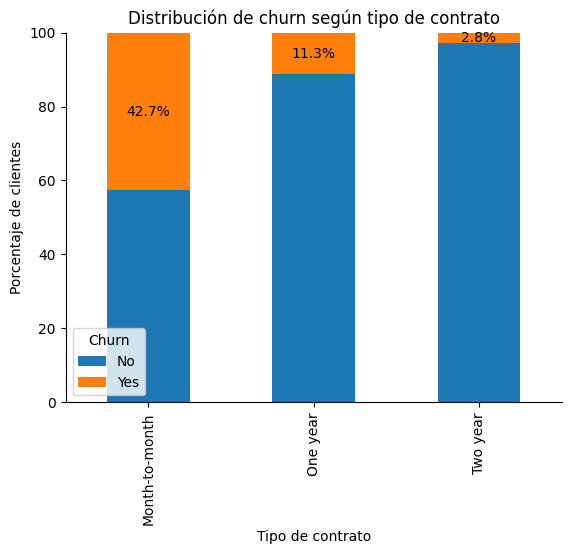

In [ ]:
import matplotlib.pyplot as plt

# Cálculo
contract_churn = pd.crosstab(
    df_churn["account.Contract"],
    df_churn["Churn"],
    normalize="index"
) * 100

contract_churn = contract_churn[["No", "Yes"]]

# Gráfico
fig, ax = plt.subplots()
contract_churn.plot(kind="bar", stacked=True, ax=ax)

# Etiquetas
ax.set_ylabel("Porcentaje de clientes")
ax.set_xlabel("Tipo de contrato")
ax.set_title("Distribución de churn según tipo de contrato")
ax.legend(title="Churn")

# Quitar spines superior y derecho
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Anotaciones (solo churn = Yes)
for i, value in enumerate(contract_churn["Yes"]):
    ax.text(
        i,
        contract_churn.loc[contract_churn.index[i], "No"] + value / 2,
        f"{value:.1f}%",
        ha="center",
        va="center"
    )

ax.set_ylim(0, 100)
plt.show()


**Análisis de los resultados**

El churn se concentra fuertemente en clientes con contrato Month-to-month (≈43%), mientras que en contratos de uno y dos años es marginal.
Esto sugiere que la evasión no está asociada a la calidad del servicio, sino al tipo de vínculo contractual y posiblemente a estrategias de adquisición enfocadas en corto plazo.

## 5.3 Antiguedad vs Churn

In [ ]:
df_churn["customer.tenure"].describe()


,customer.tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [ ]:
df_churn.groupby("Churn")["customer.tenure"].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


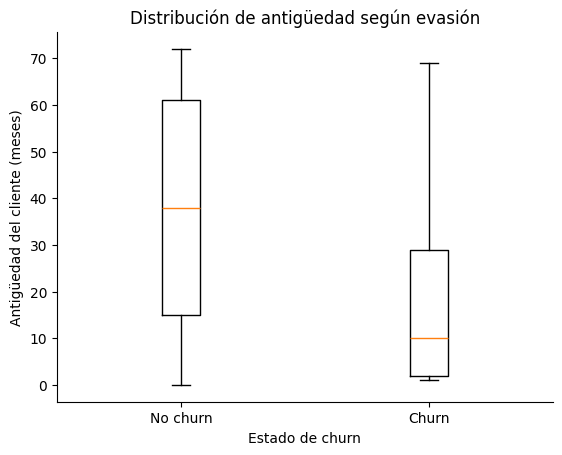

In [ ]:
import matplotlib.pyplot as plt

# Preparar datos
data = [
    df_churn[df_churn["Churn"] == "No"]["customer.tenure"],
    df_churn[df_churn["Churn"] == "Yes"]["customer.tenure"]
]

# Gráfico
fig, ax = plt.subplots()
ax.boxplot(data, tick_labels=["No churn", "Churn"], showfliers=False)

# Etiquetas
ax.set_ylabel("Antigüedad del cliente (meses)")
ax.set_xlabel("Estado de churn")
ax.set_title("Distribución de antigüedad según evasión")

# Quitar spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()


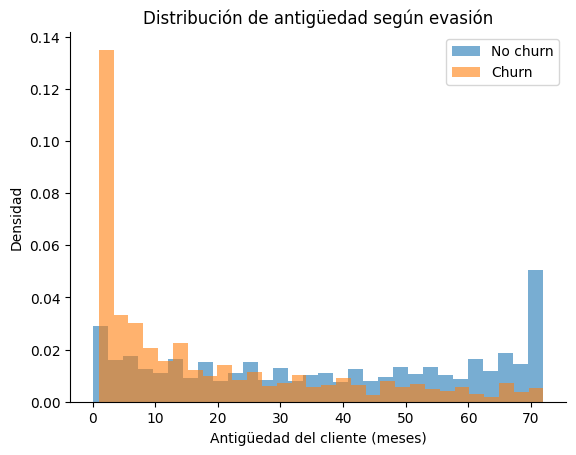

In [ ]:
import matplotlib.pyplot as plt

# Datos
tenure_no = df_churn[df_churn["Churn"] == "No"]["customer.tenure"]
tenure_yes = df_churn[df_churn["Churn"] == "Yes"]["customer.tenure"]

# Gráfico
fig, ax = plt.subplots()

ax.hist(
    tenure_no,
    bins=30,
    density=True,
    alpha=0.6,
    label="No churn"
)

ax.hist(
    tenure_yes,
    bins=30,
    density=True,
    alpha=0.6,
    label="Churn"
)

# Etiquetas
ax.set_xlabel("Antigüedad del cliente (meses)")
ax.set_ylabel("Densidad")
ax.set_title("Distribución de antigüedad según evasión")
ax.legend()

# Quitar spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()


**Análsis de los resultados**

La empresa retiene bien a los clientes una vez superado el primer año, pero presenta una fuerte fuga en los primeros meses. Esto sugiere que las estrategias de adquisición actuales no están generando relaciones de largo plazo.

##5.4 Precio vs Churn

In [ ]:
df_churn["account.Charges.Monthly"].describe()


,account.Charges.Monthly
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [ ]:
df_churn.groupby("Churn")["account.Charges.Monthly"].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


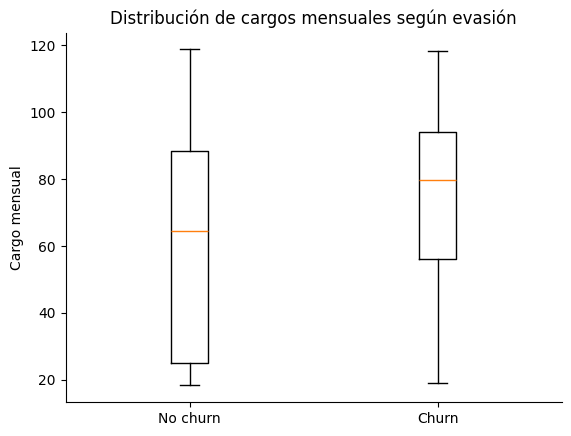

In [ ]:
import matplotlib.pyplot as plt

#Datos
data = [
    df_churn[df_churn["Churn"] == "No"]["account.Charges.Monthly"],
    df_churn[df_churn["Churn"] == "Yes"]["account.Charges.Monthly"]
]

#Gráfico
fig, ax = plt.subplots()

ax.boxplot(
    data,
    tick_labels=["No churn", "Churn"],
    showfliers=False
)
#Etiquetas

ax.set_ylabel("Cargo mensual")
ax.set_title("Distribución de cargos mensuales según evasión")

# Quitar spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()


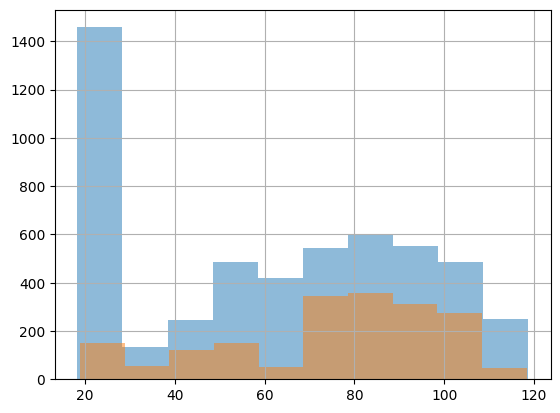

In [ ]:
import matplotlib.pyplot as plt

# Gráfico
fig, ax = plt.subplots()

ax.hist(
    df_churn[df_churn["Churn"] == "No"]["account.Charges.Monthly"],
    bins=30,
    alpha=0.6,
    label="No churn"
)

ax.hist(
    df_churn[df_churn["Churn"] == "Yes"]["account.Charges.Monthly"],
    bins=30,
    alpha=0.6,
    label="Churn"
)
# Etiquetas
ax.set_xlabel("Cargo mensual")
ax.set_ylabel("Cantidad de clientes")
ax.set_title("Distribución de cargos mensuales según evasión")
ax.legend()

# Quitar Spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()


**Análisis de los resultados**

Los clientes que abandonan pagan en promedio y mediana valores significativamente más altos que aquellos que permanecen. Dado que el churn se concentra en clientes con baja antigüedad, esto sugiere una desconexión entre el precio cobrado y el valor percibido durante las etapas iniciales del servicio.

##5.5 Análisis de Servicios vs Churn

Objetivo: Identificar qué servicios están más asociados al abandono y cuáles actúan como factores de retención.

In [ ]:
def churn_rate_por_servicio(df, servicio):
    summary = (
        df
        .groupby(servicio)["Churn_bin"]
        .agg(
            clientes="count",
            churn_rate="mean"
        )
        .sort_values("churn_rate", ascending=False)
    )
    summary["churn_rate"] = summary["churn_rate"] * 100
    return summary


Tipo de contrato

In [ ]:
churn_rate_por_servicio(df_churn, "account.Contract")


,clientes,churn_rate
account.Contract,,
Month-to-month,3875,42.709677
One year,1473,11.269518
Two year,1695,2.831858


Soporte técnico

In [ ]:
churn_rate_por_servicio(df_churn, "internet.TechSupport")


,clientes,churn_rate
internet.TechSupport,,
No,3473,41.635474
Yes,2044,15.166341
No internet service,1526,7.404980


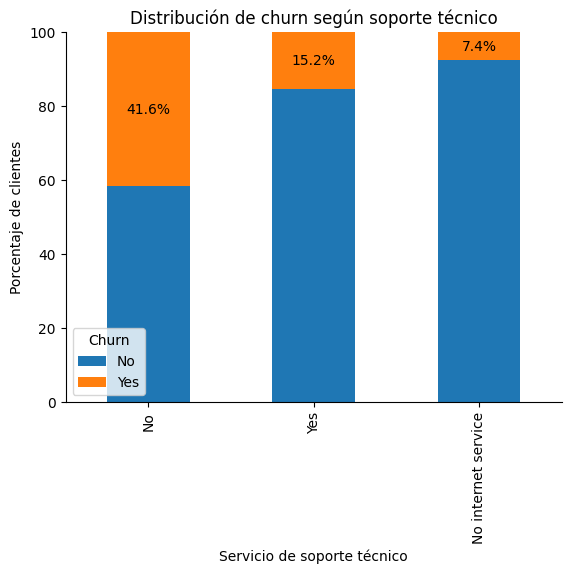

In [ ]:
import matplotlib.pyplot as plt

# Cálculo
techsupport_churn = pd.crosstab(
    df_churn["internet.TechSupport"],
    df_churn["Churn"],
    normalize="index"
) * 100

# Orden lógico de columnas
techsupport_churn = techsupport_churn[["No", "Yes"]]

# Ordenar por churn (Yes)
techsupport_churn = techsupport_churn.sort_values("Yes", ascending=False)

# Gráfico
fig, ax = plt.subplots()
techsupport_churn.plot(kind="bar", stacked=True, ax=ax)

# Etiquetas
ax.set_ylabel("Porcentaje de clientes")
ax.set_xlabel("Servicio de soporte técnico")
ax.set_title("Distribución de churn según soporte técnico")
ax.legend(title="Churn")

# Quitar spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Anotaciones (solo churn = Yes)
for i, value in enumerate(techsupport_churn["Yes"]):
    ax.text(
        i,
        techsupport_churn.loc[techsupport_churn.index[i], "No"] + value / 2,
        f"{value:.1f}%",
        ha="center",
        va="center"
    )

ax.set_ylim(0, 100)
plt.show()


Seguridad Online

In [ ]:
churn_rate_por_servicio(df_churn, "internet.OnlineSecurity")


,clientes,churn_rate
internet.OnlineSecurity,,
No,3498,41.766724
Yes,2019,14.611194
No internet service,1526,7.404980


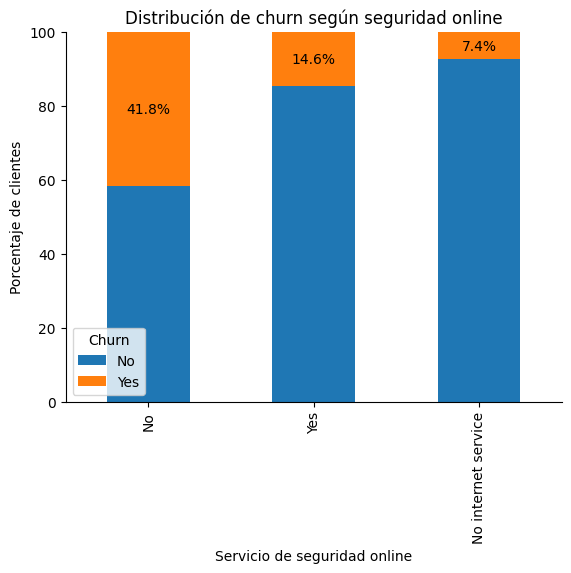

In [ ]:
import matplotlib.pyplot as plt

# Cálculo
security_churn = pd.crosstab(
    df_churn["internet.OnlineSecurity"],
    df_churn["Churn"],
    normalize="index"
) * 100

# Orden lógico de columnas
security_churn = security_churn[["No", "Yes"]]

# Ordenar por churn (Yes)
security_churn = security_churn.sort_values("Yes", ascending=False)

# Gráfico
fig, ax = plt.subplots()
security_churn.plot(kind="bar", stacked=True, ax=ax)

# Etiquetas
ax.set_ylabel("Porcentaje de clientes")
ax.set_xlabel("Servicio de seguridad online")
ax.set_title("Distribución de churn según seguridad online")
ax.legend(title="Churn")

# Quitar spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Anotaciones (solo churn = Yes)
for i, value in enumerate(security_churn["Yes"]):
    ax.text(
        i,
        security_churn.loc[security_churn.index[i], "No"] + value / 2,
        f"{value:.1f}%",
        ha="center",
        va="center"
    )

ax.set_ylim(0, 100)
plt.show()


Tipo de Internet

In [ ]:
churn_rate_por_servicio(df_churn, "internet.InternetService")


,clientes,churn_rate
internet.InternetService,,
Fiber optic,3096,41.892765
DSL,2421,18.959108
No,1526,7.404980


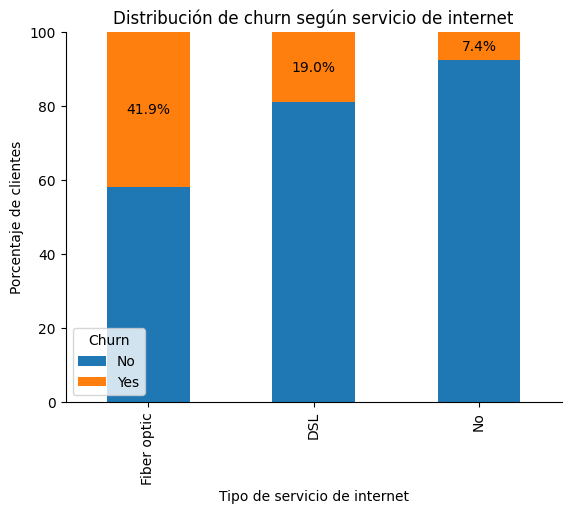

In [ ]:
import matplotlib.pyplot as plt

# Cálculo
internet_churn = pd.crosstab(
    df_churn["internet.InternetService"],
    df_churn["Churn"],
    normalize="index"
) * 100

# Orden lógico de columnas
internet_churn = internet_churn[["No", "Yes"]]

# Ordenar por churn
internet_churn = internet_churn.sort_values("Yes", ascending=False)

# Gráfico
fig, ax = plt.subplots()
internet_churn.plot(kind="bar", stacked=True, ax=ax)

# Etiquetas
ax.set_ylabel("Porcentaje de clientes")
ax.set_xlabel("Tipo de servicio de internet")
ax.set_title("Distribución de churn según servicio de internet")
ax.legend(title="Churn")

# Quitar spines superiores
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Anotaciones (solo churn = Yes)
for i, value in enumerate(internet_churn["Yes"]):
    ax.text(
        i,
        internet_churn.loc[internet_churn.index[i], "No"] + value / 2,
        f"{value:.1f}%",
        ha="center",
        va="center"
    )

ax.set_ylim(0, 100)
plt.show()


##5.6 Análisis exploratorio adicional (Correlaciones)

In [53]:
df_corr = df_churn.copy()

df_corr["Churn_bin"] = df_corr["Churn"].map({"Yes": 1, "No": 0})


In [55]:
df_corr["Churn_bin"].value_counts()
df_corr.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Churn_bin
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1


Hipotesis:
A mayor cantidad de servicios contratados, menor probabilidad de churn.

In [56]:
service_cols = [
    "phone.PhoneService",
    "phone.MultipleLines",
    "internet.OnlineSecurity",
    "internet.OnlineBackup",
    "internet.DeviceProtection",
    "internet.TechSupport",
    "internet.StreamingTV",
    "internet.StreamingMovies"
]

df_corr["Total_Servicios"] = (
    df_corr[service_cols]
    .apply(lambda x: (x == "Yes").sum(), axis=1)
)


Variables numéricas relevantes

In [59]:
corr_vars = df_corr[
    [
        "Churn_bin",
        "customer.tenure",
        "Cuentas_Diarias",
        "Total_Servicios"
    ]
]

corr_vars.corr()


,Churn_bin,customer.tenure,Cuentas_Diarias,Total_Servicios
Churn_bin,1.000000,-0.352229,0.193356,-0.067264
customer.tenure,-0.352229,1.000000,0.247900,0.523600
Cuentas_Diarias,0.193356,0.247900,1.000000,0.802322
Total_Servicios,-0.067264,0.523600,0.802322,1.000000


Matriz de correlación

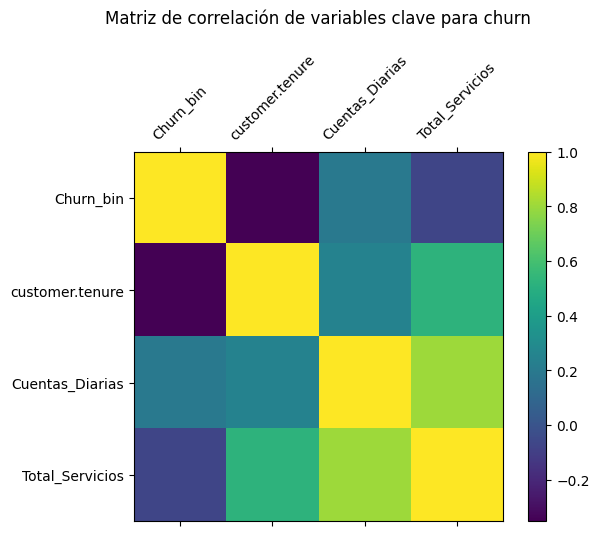

In [60]:
import matplotlib.pyplot as plt

corr_matrix = corr_vars.corr()

fig, ax = plt.subplots()
cax = ax.matshow(corr_matrix)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

fig.colorbar(cax)
ax.set_title("Matriz de correlación de variables clave para churn", pad=20)

plt.show()


**Análisis de correlaciones**

La matriz de correlación muestra que la evasión se relaciona negativamente con la antigüedad del cliente y con la cantidad de servicios contratados, mientras que presenta una correlación positiva con el costo diario del servicio. Esto refuerza la hipótesis de que clientes nuevos, con menor nivel de vinculación y mayor carga económica relativa, presentan mayor probabilidad de churn.

**Análisis de los resultados del EDA**

La evasión presenta diferencias significativas según el tipo de contrato y los servicios asociados. Los clientes con contratos mes a mes muestran una tasa de churn sustancialmente mayor que aquellos con contratos anuales o bianuales, lo que sugiere que la ausencia de compromiso de largo plazo es un factor crítico en la decisión de abandono.
Asimismo, se observa que los clientes que no cuentan con servicios de soporte técnico ni seguridad online presentan tasas de evasión considerablemente más altas. Esto indica que estos servicios cumplen un rol relevante en la retención, al reducir fricciones operativas y mejorar la percepción del valor del servicio.
Por otro lado, los clientes con servicio de internet por fibra óptica registran una de las tasas de churn más elevadas. Dado que este segmento suele asociarse a precios más altos y mayores expectativas, el resultado sugiere una posible brecha entre el valor percibido y la experiencia efectiva del servicio, especialmente en clientes con contratos de corto plazo.
En conjunto, los resultados indican que la evasión no responde a un único factor, sino a la combinación de contratos flexibles, mayor exposición a precios elevados y una menor adopción de servicios complementarios. Este perfil concentra el mayor riesgo de churn y representa un foco prioritario para estrategias de retención.

#**Conclusiones e Insights**

A partir del análisis exploratorio realizado, se identifican los siguientes hallazgos clave:

- El tipo de contrato es el principal determinante de churn
Los clientes con contrato Month-to-month presentan una tasa de evasión cercana al 43%, significativamente superior a contratos anuales o bianuales. Esto sugiere que la falta de compromiso contractual aumenta la probabilidad de abandono.

- El riesgo de churn se concentra en clientes de baja antigüedad
Los clientes que abandonan el servicio tienen, en promedio, menos de la mitad de antigüedad que quienes permanecen. Esto indica que el problema se concentra en las etapas iniciales del ciclo de vida del cliente.

- Mayor carga económica relativa aumenta la probabilidad de evasión
Los clientes que abandonan presentan cargos mensuales y diarios superiores, lo que sugiere una posible brecha entre precio pagado y valor percibido.

- Servicios complementarios actúan como factores de retención
La ausencia de soporte técnico y seguridad online está asociada a mayores tasas de churn. Los clientes con mayor cantidad de servicios contratados muestran menor probabilidad de abandono.

- Segmento de fibra óptica presenta mayor riesgo.
El servicio de fibra óptica concentra una de las tasas más altas de churn, posiblemente debido a mayores expectativas asociadas al precio y calidad del servicio.
En conjunto, la evasión no responde a un único factor, sino a la combinación de contratos flexibles, menor vinculación con la empresa y mayor carga económica inicial.

#**Recomendaciones Estratégicas**

Con base en los hallazgos del análisis, se proponen las siguientes acciones:

1. Incentivar contratos de mayor duración
Diseñar estrategias comerciales que promuevan la migración desde planes Month-to-month hacia contratos anuales, mediante descuentos, beneficios adicionales o mejoras en el plan.

2. Fortalecer el onboarding en los primeros 3 meses
Dado que el churn se concentra en etapas tempranas, se recomienda implementar:
Seguimiento proactivo al cliente.
Comunicación clara de beneficios.
Soporte técnico preventivo.

3. Impulsar la adopción de servicios complementarios
Fomentar la contratación de soporte técnico y seguridad online como parte de paquetes integrados, ya que actúan como mecanismos de retención.

4. Revisar propuesta de valor del segmento fibra óptica
Analizar experiencia, calidad del servicio y expectativas del cliente en este segmento para reducir la brecha entre precio y percepción de valor.

5. Implementar modelo predictivo de churn
Utilizar variables como antigüedad, carga económica diaria, tipo de contrato y número de servicios para construir un modelo predictivo que permita identificar clientes en riesgo y activar acciones preventivas.